In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv

# # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
# import pymdna as mdna
import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

joblib is not installed. Falling back to sequential computation.


In [2]:
pdb = md.load_pdb('./1bna.pdb')
#res = pdb.atom_slice(pdb.top.select('resid 0 23'))
res = pdb.atom_slice(pdb.top.select('resid 1'))
view = nv.show_mdtraj(res)
view

NGLWidget()

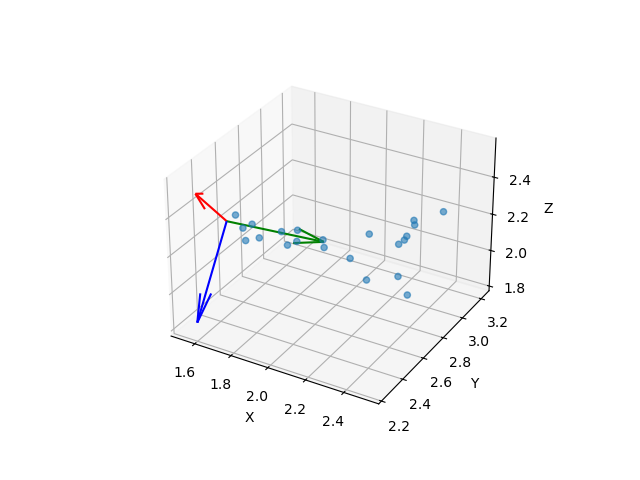

In [3]:
%matplotlib ipympl
ref = mdna.ReferenceBase(res)
ref.plot_baseframe(length=0.5)    

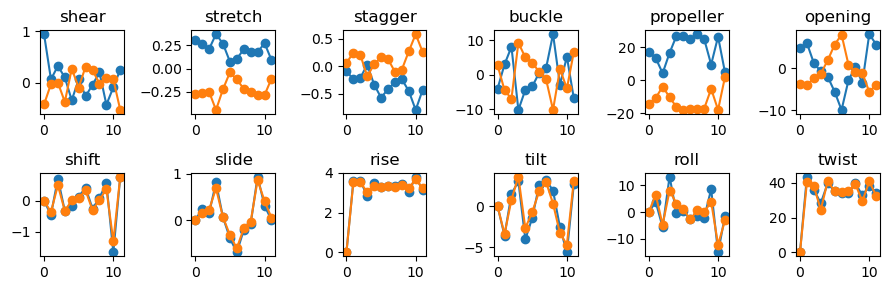

In [2]:
pdb = md.load_pdb('./1bna.pdb')
nuc = mdna.NucleicFrames(pdb)

params, names = nuc.get_parameters()

ref = data = np.array([np.genfromtxt('./1bna_x3dna.dat', skip_header=2, usecols=range(1, 13))])

fig,ax = plt.subplots(2,6, figsize=[9,3])
ax = ax.flatten()
for _,name in enumerate(names):
    

    para = params[:,:,names.index(name)]
    ref_para = ref[:,:,names.index(name)]
    
    # if _ in [5,6,7,8,10,11]:
    #     ax[_].plot(np.mean(para, axis=0)[::-1],'-o')
    # elif _ == 9:
    #     ax[_].plot(-np.mean(para, axis=0)[::-1],'-o')
    # else:
    #     ax[_].plot(np.mean(para, axis=0),'-o')
    ax[_].plot(np.mean(para, axis=0),'-o')    
    ax[_].plot(np.mean(ref_para, axis=0),'-o')
    ax[_].set_title(name)
    
fig.tight_layout()


(11, 8)


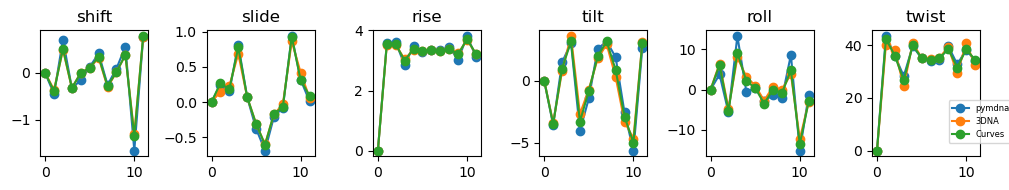

In [3]:
fig,ax = plt.subplots(1,6, figsize=[10,2])
ax = ax.flatten()

for _,name in enumerate(names[6:]):
    

    para = params[:,:,names.index(name)]
    ref_para = ref[:,:,names.index(name)]
    
    # if _ in [5,6,7,8,10,11]:
    #     ax[_].plot(np.mean(para, axis=0)[::-1],'-o')
    # elif _ == 9:
    #     ax[_].plot(-np.mean(para, axis=0)[::-1],'-o')
    # else:
    #     ax[_].plot(np.mean(para, axis=0),'-o')
    ax[_].plot(np.mean(para, axis=0),'-o')    
    ax[_].plot(np.mean(ref_para, axis=0),'-o')
    ax[_].set_title(name)



step = np.loadtxt('./output/step.dat')
print(step.shape)
extra_column = np.zeros((1, 8))
step = np.concatenate((extra_column,step), axis=0)
for i in range(0, 6):
    param = step[:, i]
    ax[i].plot(param, '-o')


fig.legend(['pymdna', '3DNA','Curves'], loc=[0.94,0.25],fontsize=6)
fig.tight_layout()

(12, 8)


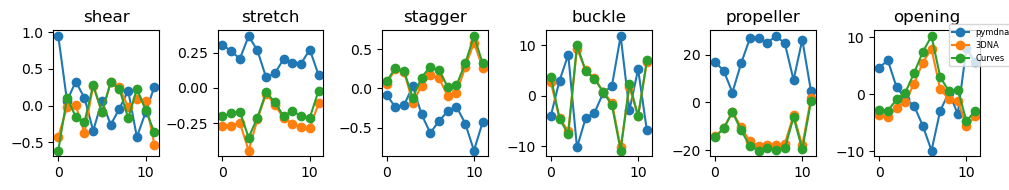

In [4]:
fig,ax = plt.subplots(1,6, figsize=[10,2])
ax = ax.flatten()

for _,name in enumerate(names[:6]):
    

    para = params[:,:,names.index(name)]
    ref_para = ref[:,:,names.index(name)]
    
    # if _ in [5,6,7,8,10,11]:
    #     ax[_].plot(np.mean(para, axis=0)[::-1],'-o')
    # elif _ == 9:
    #     ax[_].plot(-np.mean(para, axis=0)[::-1],'-o')
    # else:
    #     ax[_].plot(np.mean(para, axis=0),'-o')
    ax[_].plot(np.mean(para, axis=0),'-o')    
    ax[_].plot(np.mean(ref_para, axis=0),'-o')
    ax[_].set_title(name)



pair = np.loadtxt('./output/pair.dat')
print(step.shape)

for i in range(0, 6):
    param = pair[:, i]
    ax[i].plot(param, '-o')


fig.legend(['pymdna', '3DNA','Curves'], loc=[0.94,0.65],fontsize=6)
fig.tight_layout()